# <span style="color:green"> Laboratorio di Simulazione numerica (NSL) </span>
## <span style="color:blue">  Esercitazione 5</span>

### Esercizio 05.1 Campionamento del modulo quadro delle funzioni d'onda con l'algoritmo di Metropolis

La **funzione d'onda** $\Psi$, nel contesto della meccanica quantistica, viene usata per descrivere matematicamente lo stato di un sistema quantistico. In generale, è una funzione che dipende dalle coordinate spaziali, dallo spin e dalla variabile temporale. Essa può essere interpretata come un'*ampiezza di probabilità* a valori complessi, da cui segue che è possibile attribuire al suo modulo quadro, $|\Psi|^2$, il naturale significato di una **densità di probabilità**.
In linea di principio, se si conoscesse la funzione d'onda associata ad uno stato quantistico (quindi il suo modulo quadro) si potrebbe sfruttare la precedente interpretazione per **campionare** punti distribuiti secondo tale densità di probabilità con lo strumento dell'**algoritmo di Metropolis** ed estrarre dalle simulazioni numeriche di specifici sistemi valori e quantità di notevole interesse fisico.


#### L' algoritmo di Metropolis

Il Metropolis (abbreviato con la sigla $M(RT)^2$) è una tecnica di campionamento avanzata che consente di campionare una **qualsiasi** funzione di distribuzione di probabilità $p(x)$ indipendentemente dalla complessità analitica e per un numero di dimensioni arbitrarie.

L'efficacia dell'algoritmo è garantita dal **Teorema di Markov**, infatti, lo strumento è strettamente collegato ai processi stocastici di Markov. Il campionamento di una pdf è ottenuto costruendo un opportuno processo di Markov e simulandolo. 

Nel concreto, campionare una probabilità *desiderata* si traduce nel costruire un Random Walk i cui steps progressivi sono indicati da variabil casuali $x_1,x_2,....,x_n,..$, che seguono i passi di una **catena di Markov**(discreta o continua) distribuite secondo le *pdf*, inizialmente qualsiasi, $d_1(x_1),d_2(x_2),....., d_n(x_n),.. $. L'obiettivo è che venga soddisfatto il seguenete limite asintotico:
$$
\lim_{n \to +\infty} d_n(x) = p(x)
$$

Per il teorema di Markov tale condizione equivale a trovare una **matrice di trasferimento stocastica** (probabilità di transizone) $K(x|y)$ che sia **regolare**, cioè tale per cui la distribuzione target sia invariante per $K$ o equivalenetemente che soddisfi l'equazione del bilancio dettagliato.

Questa condizione viene realizzata fattorizzando $K$ in due contributi $K(x|y) = T(x|y) \times A(x|y)$ tali che:

- $T(x|y)$  probabilità di **transizione tentativo**, usata per proporre una *mossa* $x \rightarrow y$, ossia l'eventuale nuova configurazione, sia qualsiasi.

- $A(x|y) = min[1,\frac{T(y|x)p(x)}{T(x|y)p(x)}]$ probabilità di **accettazione** della particolare mossa proposta.

Operando tale scelta la $p(x)$ risulta invariante rispetto al Kernel $K$ e che $\lim_{n \to +\infty} d_{n+1}(x) = \int K(x|y) d_{n}(y)dy = p(x)$ .

#### Obiettivo

L'obiettivo dell'esercitazione consiste nel campionare il modulo quadro delle funzioni d'onda che descrivono:

1. lo **stato fondamentale** (**GS**) dell'atomo di idrogeno $\Psi_{1,0,0}(x,y,z)=\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-\frac{\sqrt{x^2+y^2+z^2}}{a_0}}$
2. lo **stato eccitato 2p** dell'atomo di idrogeno $\Psi_{2,1,0}(x,y,z)=\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} z e^{-\frac{\sqrt{x^2+y^2+z^2}}{2a_0}}$

dove le coordinate usate sono **cartesiane** $(x,y,z)$ e $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$nm rappresenta il **raggio di Bohr**.

Con i punti campionati, mediante l'algoritmo di Metropolis, vengono in seguito stimate le grandezze $\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0$ che altro non rappresentano che il **valore medio** della distanza radiale dell'elettrone dal nucleo coincidente con l'origine del sistema di riferimento considerato. 

La valutazione di queste quantità sarà eseguita calcolando gli integrali con le usuali tecniche Monte Carlo già acquisite come $\left\langle r \right\rangle = \frac{1}{N}\sum_{i=1}^{N} r(x_i,y_i,z_i)$ con $x_i,y_i,z_i$ coordinate delle configurazioni campionate con il Metropolis e $N$ il numero di campionamenti o steps Monte Carlo, accompagnate dalle relative incertezze statistiche.  

#### Equilibrazione, Simulazione, codice e scelta dei parametri

Per effettuare la simulazione che realizza una catena di Markov (ossia un Random Walk), sfruttando il Metropolis, risulta comodo esprimere tutte le lunghezze in unità di $a_0$ (*unità del raggio di Bohr*), in questo modo si lavora con valori non troppo grandi in termini assoluti. Le grandezze teoriche importanti diventano dunque:

1. $$
   \Psi_{1,0,0}(x,y,z)=\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-\sqrt{(x^*)^2+(y^*)^2+(z^*)^2}}
   \quad
   \left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}
   $$  
   
2. $$
   \Psi_{2,1,0}(x,y,z)=\frac{a_0^{-3/2}}{8}\sqrt{\frac{2}{\pi}} e^{-\frac{\sqrt{(x^*)^2+(y^*)^2+(z^*)^2}}{2}}
   \quad
   \left\langle r \right\rangle_{\Psi_{2,1,0}} = 5
   $$
   
con $x^* = x/a_0 $, lunghezze in unità del raggio di Bohr.

Per campionare tali PDF vengono usate 2 **probabilità di transizione tentativo** $T(\vec{x}|\vec{y})$ differenti:

1. Probabilità di transizione **uniforme**. 

   La *mossa proposta*, che in seguito l'algoritmo dovrà decidere se accettare o meno, produce un nuovo punto del RW effettuando un passo, lungo le tre coordinate $(x,y,z)$ che individuano una specifica configurazione, uniformemente distribuito sull'intervallo  $[x_{old} - \frac{delta}{2}, x_{old} + \frac{delta}{2}]$, dove  $x_{old}$ rappresenta la prima coordinata della vecchia configurazione campionata. In questo modo si ottiene una $T(\vec{x}|\vec{y})$ uniforme su un cubo di lato $delta$ e le nuove configurazioni sono generate uniformemente all'interno del cubo stesso.
   
   
   
2. Probabilità di transizione **normale multivariata**, cioè una Gaussiana indipendente per ciascuna delle tre coordinate $x,y,z$.
   
   La *mossa proposta* genera un nuova variabile casuale le cui coordinate sono estratte a partire da una PDF            Gaussiana centrata sulla rispettiva coordinata del punto campionato allo step precedente del RW progressivamente prodotto e con una $\sigma$ opportuna.

Occorre sottolineare che entrambe le probabilità di transizione proposte sono **simmetriche** sotto lo scambio di $\vec{x}$ e $\vec{y}$. Ciò permette di semplificare l'espressione per determinare la corrispondente probabilità di accettazione $A(\vec{x}|\vec{y})$. Inoltre la scelta di $T(\vec{x}|\vec{y})$, purchè tutte sono valide, può influire pesantemente, per esempio, sulla velocità di convergenza dell'algoritmo.
   
Per generare le nuove configurazioni proposte, nel codice, è stata implementata la routine *Move()* che, inoltre, esegue il test del Metropolis. 
   
Nella precedente descrizione si sono volutamente lasciati indeterminati alcuni parametri, $\sigma$ o $delta$. La fase preparatoria della simulazione, infatti, prevede di fissare tali parametri in modo tale che la mossa proposta mediante la probabilità di transizione soddisfi la **regola empirica del 50%**, ossia, predisporre l'algoritmo in modo che circa metà delle nuove posizioni generate vengano accettate e la restante metà rifiutate, realizzando, in media, una probabilità $A(\vec{x}|\vec{y}) = 50$% . 

Questa operazione di controllo iniziale consente di raggiungere un ragionevole compromesso tra passi del RW troppo ampi che implicherebbero una **scarsa efficienza** della tecnica (numerosi punti sarebbero scartati) e passi troppo brevi che produrrebbero variabili casuali **altamente correlate** (si stano trattando, infatti, processi stocastici di Markov). Tale scelta può essere compiuta entro un certo grado di libertà dipendente dalla PDF target.

Dopo alcuni tentativi e prove iniziali, servendosi di opportune variabili contatore nel codice(*attempted* e *accepted*) che permettono di calcolare il tasso di accettazione, si è deciso di fissare i parametri come indicato di seguito:

1. $delta = 2.5$ per la simulazione del **GS** con $T(\vec{x}|\vec{y})$ **uniforme**. 
2. $delta = 6.0$ per la simulazione del  **2p** con $T(\vec{x}|\vec{y})$ **uniforme**.
3. $\sigma = 0.75$ per la simulazione del  **GS** con $T(\vec{x}|\vec{y})$ **normale multivariata**. 
4. $\sigma = 1.9$ per la simulazione del  **2p** con $T(\vec{x}|\vec{y})$ **normale multivariata**.

con una probabilità di accettazione compresa sempre tra $47$%$<A(\vec{x}|\vec{y})<53$%.

Prima di cominciare con le misure effettive del raggio occorre scegliere in modo opportuno il punto di partenza del RW nello spazio 3D. Risulta conveniente fissare la posizione iniziale in modo tale che questa ricada in un intervallo ad alta probabilità per la PDF da campionare, agevolando la convergenza asintotica (uno degli *svantaggi* del Metropolis insieme al grado di *correlazione* delle configurazioni prodotte) e l'efficienza dell'algoritmo.

Nel sistema analizzato se si partisse da una distanza dall'origine maggiore di $10 a_0$ si impiegherebbero molti più steps MC prima di iniziare a campionare punti distribuiti secondo la densità di probabilità desiderata rispetto ad una partenza fissata vicino all'origine alla quale corrisponde un'elevato valore delle densità di probabilità da campionare.

Qui sotto si riportano le scelte effettuate che fissano il punto di partenza del RW (in unità di $a_0$) che dipendono dunque dalla forma funzionale del modulo quadro della funzione d'onda:

1. $(x_{start},y_{start},z_{start}) = (0,0,0)$ ossia l'origine ossia $r = 0$ per  ${|\Psi_{1,0,0}(x,y,z)|}^2={|\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-\sqrt{(x^*)^2+(y^*)^2+(z^*)^2}}|}^2$

2. $(x_{start},y_{start},z_{start}) = (1.2,0,0)$ ossia $r = 1.2$ per     ${|\Psi_{2,1,0}(x,y,z)|}^2={|\frac{a_0^{-3/2}}{8}\sqrt{\frac{2}{\pi}} e^{-\frac{\sqrt{(x^*)^2+(y^*)^2+(z^*)^2}}{2}}|}^2$

Inoltre è necessario **equilibrare** il sistema prima di eseguire la simulazione. Tale scopo viene raggiunto plottando i valori istantanei della variabile $r$ in funzione degli steps MC (routine *Equilibration(int)*). L'equilibrio viene raggiunto quando l'andamento del grafico si stabilizza attorno al valore atteso accompagnato da fluttuazioni statistiche, infatti, bisogna lasciare il tempo all'algoritmo di campionare effettivamete configurazioni distribuite secondo la *pdf* target (convergenza asintotica). Scegliere un punto di partenza lontano dall'origine comporterebbe un costo computazionale maggiore per portare il sistema alla condizione di equilibrio.

Il procedimento di equilibrazione, nel codice, viene sempre eseguito all'inizio della simulazione con un numero di step Monte Carlo pari a $N_{equistep} = 5 \times 10^3$.

Ora, con il sistema equilibrato, ripetendo il procedimento che produce nuovi elementi della catena di Markov costruita e simulata con l'algoritmo di Metropolis per un numero di passi MC pari a $M = 10^6$ si ottiene il campionamento delle probabilità desiderate e i valori medi con integrazioni MC ( routine *Measure()*, *Accumulate()* e *Averages()*).

Dato che le variabili casuali successive del RW generate dall'algoritmo potrebbero essere fortemente correlate bisogna porre particolare attenzione al calcolo delle incertezze statistiche. Queste ultime sono determinate con il **blocking method** che permette, suddividendo in $N=100$ blocchi gli $M$ passi totali, di estrarre valori medi delle grandezze, da ciascun blocco, **statisticamente indipendenti** a patto che i blocchi siano sufficientemente lunghi. In questo caso il numero di passi all'interno di ciascun blocco è stato settato pari a $L=\frac{M}{N}=10^4$, ritenuto adeguato affinchè il risultato estratto da ogni blocco sia sufficientemente scorrelato dagli altri. Se tale condizione viene soddisfatta le stime delle incertezze sono ottenute sfruttando il Teorema del Limite Centrale, di cui ora le ipotesi sono rispettate.

Tutti i parametri di input, sopra esplicitati, per le 4 simulazioni sono letti dal codice con la routine di inizializzazione *Input()* dal file input.dat in cui vengono di volta in volta sovrascritti i contenuti dei file *input.GS(2P)_Unif(Gauss)*  (con il comando del makefile *input_GS(2P)_Unif(Gauss)*) che contengono le coordinate $(x_{start},y_{start},z_{start})$ della configurazione di partenza, due variabili intere che indicano quale modulo quadro di funzione d'onda deve essere campionato(*wave_function*) e quale sia la probabilità di transizione da usare (*transition_probability*), i parametri delle mosse del Metropolis e le informazioni sul numero e la dimensione dei blocchi.

Qui di seguito sono riportati gli esiti salienti della fase di equilibrazione e del  processo di simulazione, per ciascuno dei 4 casi sopra spiegati, che mostrano, mediante 4 grafici opportuni, l'andamento delle stime del $\left\langle r \right\rangle$ in funzione del numero di blocchi con le relative incertezze statistiche rappresentate dalle barre d'errore verticali.


Bohr radius unit


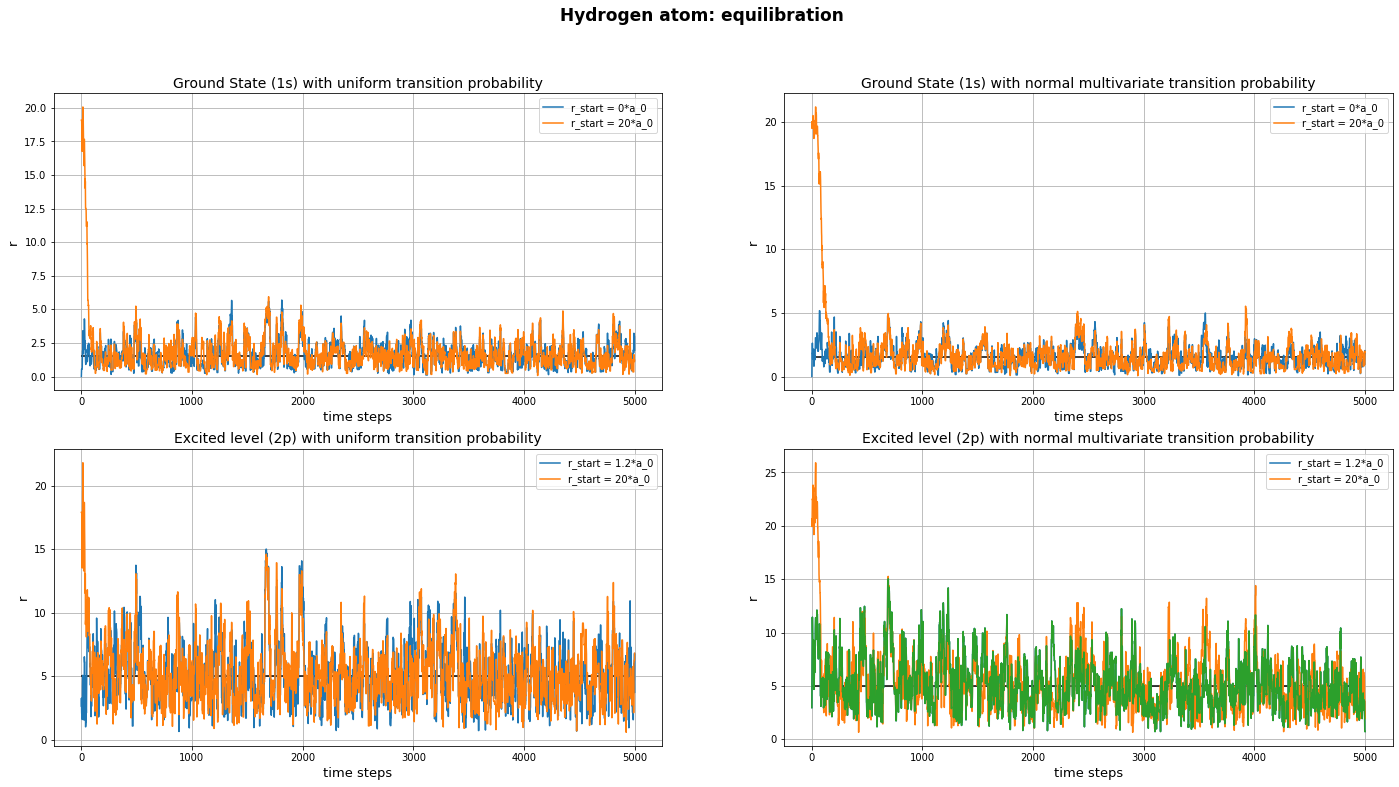

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# the best starting configuration
steps, r_equi_GS_Unif = np.loadtxt("Results/output.r_equi_GS_Unif", usecols=(0,1), unpack='true')
steps, r_equi_GS_Gauss = np.loadtxt("Results/output.r_equi_GS_Gauss", usecols=(0,1), unpack='true')
steps, r_equi_2P_Unif = np.loadtxt("Results/output.r_equi_2P_Unif", usecols=(0,1), unpack='true')
steps, r_equi_2P_Gauss = np.loadtxt("Results/output.r_equi_2P_Gauss", usecols=(0,1), unpack='true')

# starting radial distance r_start = 20*a_0
steps, r_equi_20_GS_Unif = np.loadtxt("Results/output.r_equi_20_GS_Unif", usecols=(0,1), unpack='true')
steps, r_equi_20_GS_Gauss = np.loadtxt("Results/output.r_equi_20_GS_Gauss", usecols=(0,1), unpack='true')
steps, r_equi_20_2P_Unif = np.loadtxt("Results/output.r_equi_20_2P_Unif", usecols=(0,1), unpack='true')
steps, r_equi_20_2P_Gauss = np.loadtxt("Results/output.r_equi_20_2P_Gauss", usecols=(0,1), unpack='true')

print ('Bohr radius unit')
r_GS = 3/2
r_2P = 5

fig=plt.figure(figsize=(24,12))
plt.suptitle("Hydrogen atom: equilibration",fontsize='17',weight = 'bold')

plt.subplot(221)
plt.hlines(r_GS, 0, steps.size)
plt.plot(steps, r_equi_GS_Unif, label = "r_start = 0*a_0")
plt.plot(steps, r_equi_20_GS_Unif, label = "r_start = 20*a_0")
plt.title("Ground State (1s) with uniform transition probability", size='14')
plt.xlabel('time steps',size='13')
plt.ylabel('r',size='13')
plt.grid(True)
plt.legend()

plt.subplot(222)
plt.hlines(r_GS, 0, steps.size)
plt.plot(steps, r_equi_GS_Gauss, label = "r_start = 0*a_0")
plt.plot(steps, r_equi_20_GS_Gauss, label = "r_start = 20*a_0")
plt.title("Ground State (1s) with normal multivariate transition probability", size='14')
plt.xlabel('time steps',size='13')
plt.ylabel('r',size='13')
plt.grid(True)
plt.legend()

plt.subplot(223)
plt.hlines(r_2P, 0, steps.size)
plt.plot(steps, r_equi_2P_Unif, label = "r_start = 1.2*a_0")
plt.plot(steps, r_equi_20_2P_Unif, label = "r_start = 20*a_0")
plt.title("Excited level (2p) with uniform transition probability", size='14')
plt.xlabel('time steps',size='13')
plt.ylabel('r', size='13')
plt.grid(True)
plt.legend()


plt.subplot(224)
plt.hlines(r_2P, 0, steps.size)
plt.plot(steps, r_equi_2P_Gauss, label = "r_start = 1.2*a_0")
plt.plot(steps, r_equi_20_2P_Gauss, label = "r_start = 20*a_0")
plt.plot(steps, r_equi_2P_Gauss)
plt.title("Excited level (2p) with normal multivariate transition probability", size='14')
plt.xlabel('time steps',size='13')
plt.ylabel('r', size='13')
plt.grid(True)
plt.legend()

plt.show()


- I grafici riportano il processo di equilibrazione per le 4 differenti simulazioni mettendo a confronto andamenti che partono da configurazioni inizali diverse. 


- Si osserva che partendo da una distanza radiale iniziale di $r_{start} = 20 a_0$ si impiegano un maggiore numero di step MC prima di raggiungere l'equilibrio coerentemente con quanto spiegato in precedenza.

Bohr radius unit


<function matplotlib.pyplot.show(*args, **kw)>

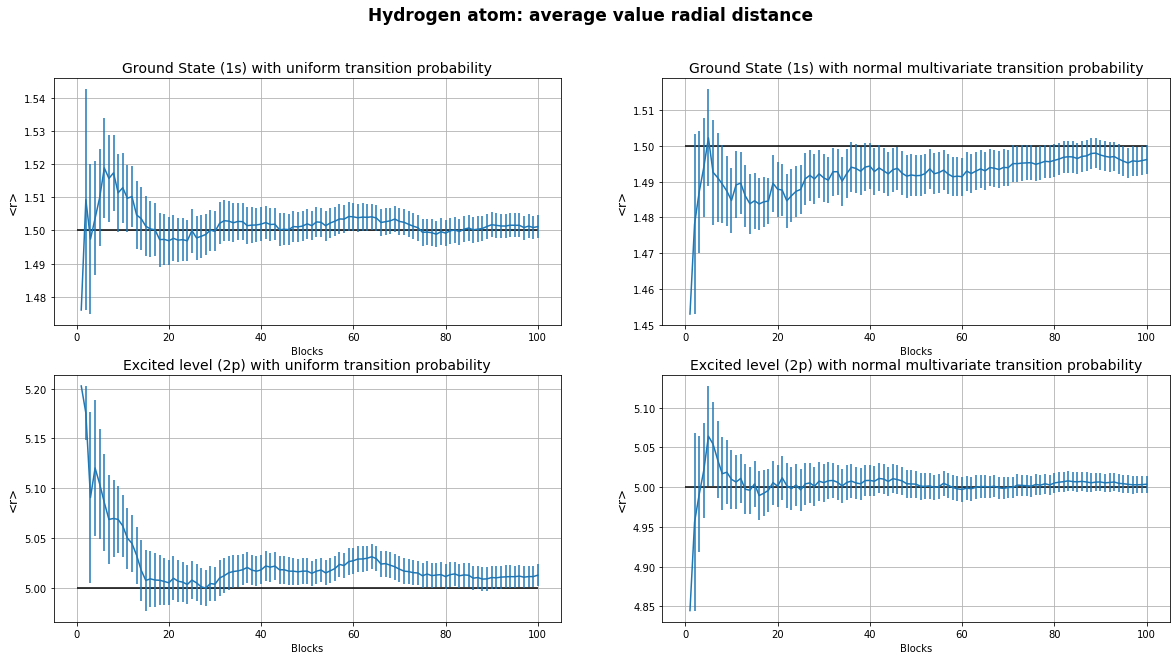

In [8]:
Nblocks, rAve_GS_Unif, error_rAve_GS_Unif = np.loadtxt("Results/output.rAve_GS_Unif", usecols=(0,2,3), unpack='true')
Nblocks, rAve_GS_Gauss, error_rAve_GS_Gauss = np.loadtxt("Results/output.rAve_GS_Gauss", usecols=(0,2,3), unpack='true')
Nblocks, rAve_2P_Unif, error_rAve_2P_Unif  = np.loadtxt("Results/output.rAve_2P_Unif", usecols=(0,2,3), unpack='true')
Nblocks, rAve_2P_Gauss, error_rAve_2P_Gauss  = np.loadtxt("Results/output.rAve_2P_Gauss", usecols=(0,2,3), unpack='true')

print ('Bohr radius unit')

fig=plt.figure(figsize=(20,10))
plt.suptitle("Hydrogen atom: average value radial distance ",fontsize='17',weight = 'bold')

plt.subplot(221)
plt.hlines(r_GS, 0, Nblocks.size)
plt.errorbar(Nblocks, rAve_GS_Unif, yerr = error_rAve_GS_Unif)
plt.title("Ground State (1s) with uniform transition probability", size='14')
plt.xlabel('Blocks')
plt.ylabel('<r>', size='12')
plt.grid(True)

plt.subplot(222)
plt.hlines(r_GS, 0, Nblocks.size)
plt.errorbar(Nblocks, rAve_GS_Gauss, yerr = error_rAve_GS_Gauss)
plt.title("Ground State (1s) with normal multivariate transition probability", size='14')
plt.xlabel('Blocks')
plt.ylabel('<r>', size='12')
plt.grid(True)

plt.subplot(223)
plt.hlines(r_2P, 0, Nblocks.size)
plt.errorbar(Nblocks, rAve_2P_Unif, yerr = error_rAve_2P_Unif)
plt.title("Excited level (2p) with uniform transition probability", size='14')
plt.xlabel('Blocks')
plt.ylabel('<r>', size='12')
plt.grid(True)

plt.subplot(224)
plt.hlines(r_2P, 0, Nblocks.size)
plt.errorbar(Nblocks,rAve_2P_Gauss, yerr = error_rAve_2P_Gauss)
plt.title("Excited level (2p) with normal multivariate transition probability", size='14')
plt.xlabel('Blocks')
plt.ylabel('<r>', size='12')
plt.grid(True)

plt.show




- I grafici mostrano il corretto funzionamento dell'algoritmo di Metropolis nel campionare le densità di probabilità *target*. I valori di $\left\langle r \right\rangle$ **convergono** al valore teorico predetto dalla meccanica quantistica in maniera soddisfacente, all'interno di **una sigma** mano a mano che il numero di blocchi aumenta.


- Si osserva che la differente scelta adottata per la probabilità di transizione $T(\vec{x}|\vec{y})$ conduce a **risultati equivalenti** in termini di valor medio del raggio. Entrambe le scelte sono buone, permettono una rapida convergenza, e non compromettono il funzionamento dell'algoritmo. 

Per concludere vengono mostrati dei grafici tridimensionali che riportano la **distribuzione 3D** dei punti campionati secondo le rispettive densità di probabilità che altro non rappresentano che le cosiddette nubi elettroniche che caratterizzano gli **orbitali** *1s* e *2p* dell'**atomo d'idrogeno**.

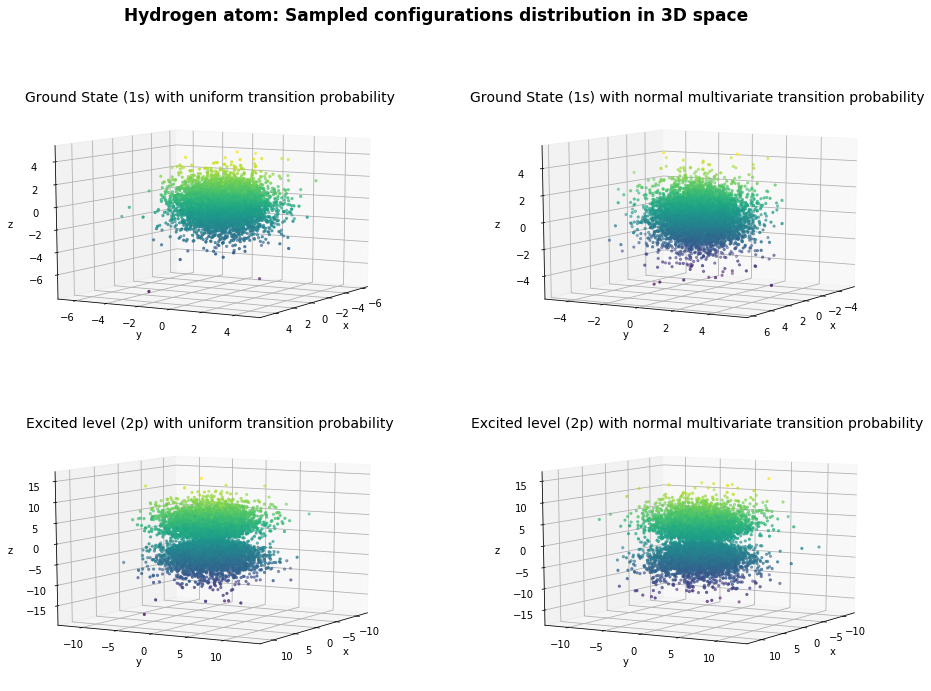

In [9]:
from mpl_toolkits.mplot3d import Axes3D

X1,Y1,Z1=np.loadtxt("Results/output.XYZsampled_GS_Unif", usecols=(0,1,2), unpack='true')
X2,Y2,Z2=np.loadtxt("Results/output.XYZsampled_GS_Gauss", usecols=(0,1,2), unpack='true')
X3,Y3,Z3=np.loadtxt("Results/output.XYZsampled_2P_Unif", usecols=(0,1,2), unpack='true')
X4,Y4,Z4=np.loadtxt("Results/output.XYZsampled_2P_Gauss", usecols=(0,1,2), unpack='true')


fig=plt.figure(figsize=(16,11))
plt.suptitle("Hydrogen atom: Sampled configurations distribution in 3D space ",fontsize='17',weight = 'bold')

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.scatter(X1, Y1, Z1, c=Z1, marker='.')
ax1.set_title("Ground State (1s) with uniform transition probability", size='14')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(10, 30)

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.scatter(X2, Y2, Z2, c=Z2, marker='.')
ax2.set_title("Ground State (1s) with normal multivariate transition probability", size='14')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.view_init(10, 30)

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.scatter(X3, Y3, Z3, c=Z3, marker='.')
ax3.set_title("Excited level (2p) with uniform transition probability", size='14')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.view_init(10, 30)

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.scatter(X4, Y4, Z4, c=Z4, marker='.')
ax4.set_title("Excited level (2p) with normal multivariate transition probability", size='14')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel('z')
ax4.view_init(10, 30)

plt.show()

- Si noti il buon accordo delle distribuzioni raffigurate con quelle note dalla teoria della meccanica quantistica, la simmetria sferica dell'orbitale 1s e i tipici lobi dell'orbitale 2p.
